# Titanic

In [1]:
%matplotlib inline
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#读取数据
path = '...'
train=pd.read_csv(path + "train.csv",header=0)
test=pd.read_csv(path + "test.csv",header=0)

In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [73]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
train_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [8]:
train_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## Visualizing

### 数量

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000298703E6668>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000029871A633C8>]], dtype=object)

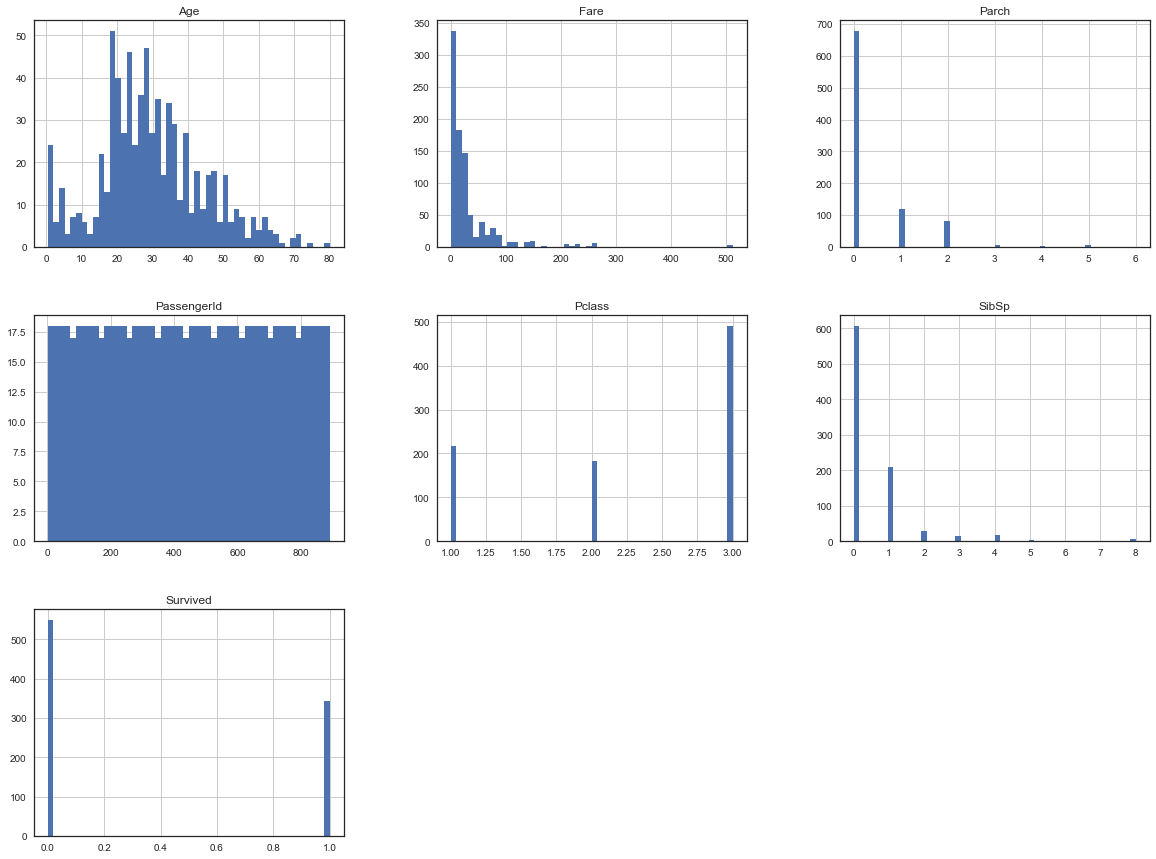

In [40]:
train_data.hist(bins=50, figsize=(20,15))

### 相关性

Text(0.5,1,'train feature corr')

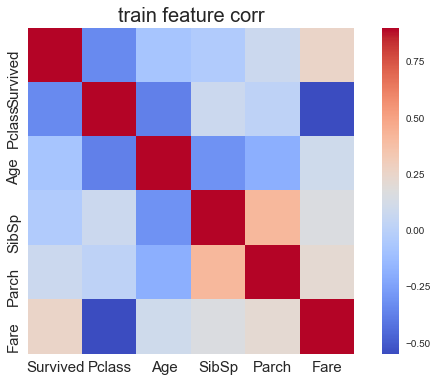

In [39]:
sns.set(context="notebook", style="white")
f, ax = plt.subplots(figsize=(10,6))
train_corr = train_data.drop('PassengerId',axis=1).corr()
sns.heatmap(train_corr, cmap="coolwarm", ax=ax, vmax=.9, square=True)
ax.set_xticklabels(train_corr.index, size=15)
ax.set_yticklabels(train_corr.columns, size=15)
ax.set_title('train feature corr', fontsize=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029871ADE1D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000029872FD6470>]], dtype=object)

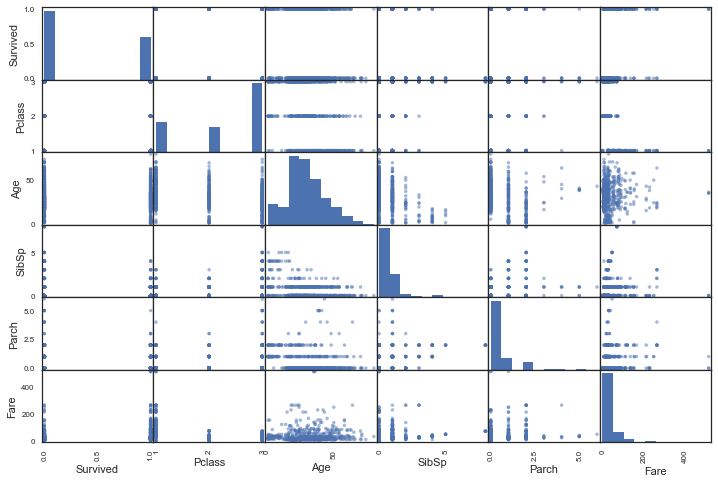

In [42]:
from pandas.plotting import scatter_matrix
attributes = ["Survived", "Pclass", "Age",
              "SibSp", 'Parch', 'Fare']
scatter_matrix(train_data[attributes], figsize=(12, 8))

### 两因数

In [54]:
train_data["FareBucket"] = train_data["Fare"] // 200 * 200
train_data[["FareBucket", "Survived"]].groupby(['FareBucket']).mean()

,Survived
FareBucket,
0.0,0.376579
200.0,0.647059
400.0,1.000000


In [233]:
train_data[['fellow','Survived']].groupby(['fellow']).agg(['mean',len])

Survived     
            mean  len
fellow               
0       0.303538  537
1       0.552795  161
2       0.578431  102
3       0.724138   29
4       0.200000   15
5       0.136364   22
6       0.333333   12
7       0.000000    6
10      0.000000    7

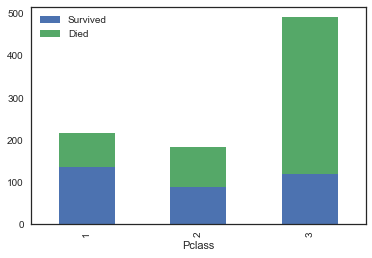

In [44]:
train_data['Died'] = 1-train_data['Survived']
train_data.groupby('Pclass').agg('sum')[['Survived','Died']].plot(kind = 'bar', stacked=True)

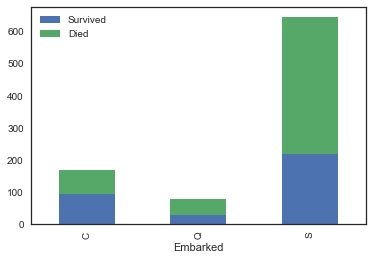

In [45]:
train_data.groupby('Embarked').agg('sum')[['Survived','Died']].plot(kind = 'bar', stacked=True)

### 三因素

In [32]:
#这个用百分比更清楚
train_data["AgeBucket"] = train_data["Age"] // 14 * 14
train_data[["AgeBucket", "Survived",'Sex']].groupby(['Sex','AgeBucket']).mean()

Survived
Sex    AgeBucket          
female 0.0        0.617647
       14.0       0.747475
       28.0       0.797619
       42.0       0.771429
       56.0       0.888889
male   0.0        0.567568
       14.0       0.149701
       28.0       0.192053
       42.0       0.205882
       56.0       0.130435
       70.0       0.142857

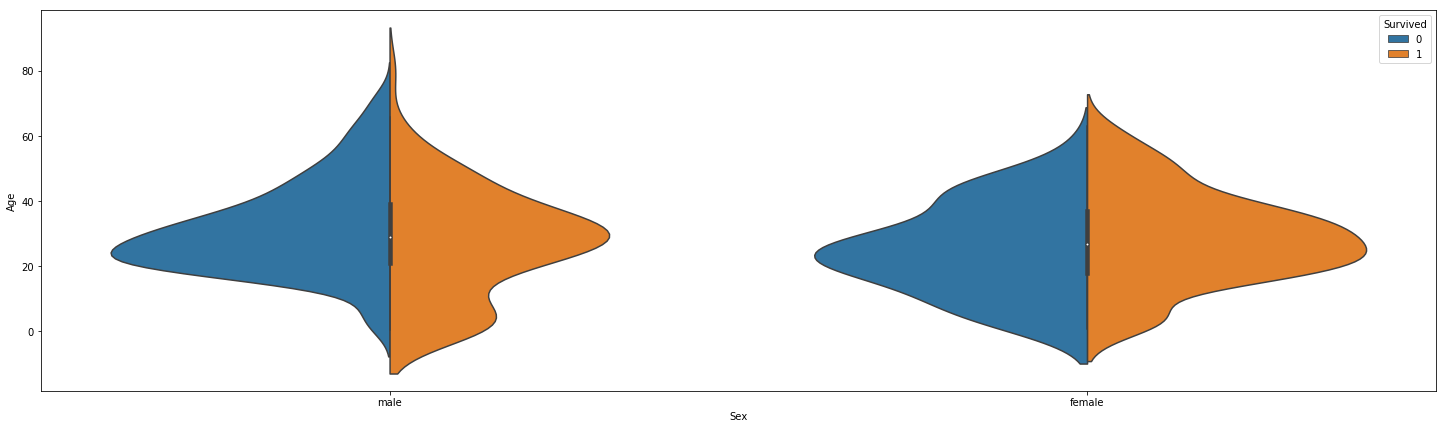

In [26]:
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=train_data, split=True)

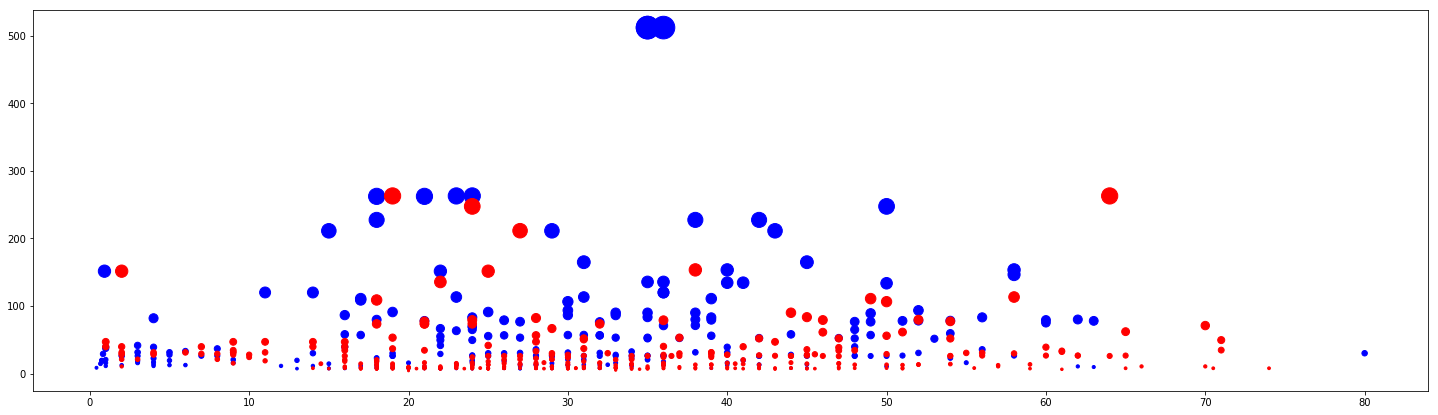

In [56]:
plt.figure(figsize=(25, 7))
ax = plt.subplot()
ax.scatter(train_data[train_data['Survived'] == 1]['Age'], train_data[train_data['Survived'] == 1]['Fare'], 
           c='b', s=train_data[train_data['Survived'] == 1]['Fare'])
ax.scatter(train_data[train_data['Survived'] == 0]['Age'], train_data[train_data['Survived'] == 0]['Fare'], 
           c='r', s=train_data[train_data['Survived'] == 0]['Fare'])

## Experimenting with Attribute Combinations

In [3]:
combine_data = pd.concat([train,test])

In [34]:
combine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 21 columns):
Age            1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Cabin2         1309 non-null object
SubTicket      1309 non-null object
SubTicket2     1309 non-null object
Subtitles      1309 non-null object
Fname          1309 non-null object
df_Fname       1309 non-null int64
am_Fname       1309 non-null int64
Familysize     1309 non-null object
Age_map        1309 non-null object
dtypes: float64(3), int64(6), object(12)
memory usage: 225.0+ KB


In [85]:
combine_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Subtitles
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


### Category variables

#### Cabin

In [46]:
train_data.groupby(by=train_data.Cabin.isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [51]:
train_data['Cabin_Zone'] = train_data.Cabin.fillna('U').str.split(' ').apply(lambda x:x[0][0])
train_data.groupby('Cabin_Zone')['Survived'].agg(['mean','count'])

,mean,count
Cabin_Zone,,
A,0.466667,15
B,0.744681,47
C,0.593220,59
D,0.757576,33
E,0.750000,32
F,0.615385,13
G,0.500000,4
T,0.000000,1
U,0.299854,687


In [5]:
# train_data.Cabin.fillna('U',inplace=True)
# train_data['Cabin2'] = train_data['Cabin'].map(lambda c: c[0])
combine_data.Cabin.fillna('U',inplace=True)
combine_data['Cabin2'] = combine_data['Cabin'].map(lambda c: c[0])

#### Ticket

In [287]:
temp_table = combine_data[:891].groupby('SubTicket2')['Survived'].agg(['count','mean'])

In [6]:
combine_data['SubTicket'] = combine_data['Ticket'].apply(lambda x:x.split(' ')[-1])

In [7]:
combine_data['SubTicket'].replace(['LINE'],'112052', inplace = True)

In [8]:
def Ticket_trans(point):
    if len(point) < 4:
        return '100'
    elif len(point) == 4:
        return point[0]+'00'
    else:
        return point[:3]

In [9]:
combine_data['SubTicket2'] = combine_data['SubTicket'].map(lambda x: Ticket_trans(x))

In [10]:
combine_data['SubTicket2']=combine_data['SubTicket2'].apply(lambda x: (x[0]+'50') if combine_data['SubTicket2'].value_counts()[x] < 10 else x)

In [11]:
combine_data['SubTicket2'].value_counts()

200    151
350    145
250    126
150     70
349     68
310     68
113     66
347     65
100     31
175     31
174     28
177     28
345     26
315     24
300     23
176     22
330     20
135     20
112     18
248     18
199     18
117     18
364     18
370     16
700     16
237     15
400     15
244     14
392     14
600     13
110     13
291     12
367     11
369     11
368     10
230     10
382     10
550      9
450      7
950      5
650      4
850      2
Name: SubTicket2, dtype: int64

In [284]:
combine_data[combine_data['SubTicket2']=="850"]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Subtitles,Familysize,Age_map,SubTicket,SubTicket2,SubTicket_c
652,21.0,NaN,S,8.4333,"Kalvik, Mr. Johannes Halvorsen",0,653,3,male,0,0.0,8475,Mr,Alone,20-25,8475,850,2
769,32.0,NaN,S,8.3625,"Gronnestad, Mr. Daniel Danielsen",0,770,3,male,0,0.0,8471,Mr,Alone,30-35,8471,850,2


In [208]:
temp2 = combine_data.SubTicket2.value_counts()

In [262]:
temp3 = pd.DataFrame(temp2)

In [210]:
temp3= temp3.reset_index()

In [217]:
temp_list = list(temp3[temp3['SubTicket2']<=3]['index'])

In [218]:
len(temp_list)

74

In [221]:
temp2 = combine_data['SubTicket2']

In [169]:
temp_table2 = combine_data[:891].groupby('SubTicket')['Survived'].agg(['count','mean'])

In [264]:
temp3['count']=np.arange(1309)

In [265]:
temp3['Tcount']=temp3['SubTicket2'].map(temp3['SubTicket2'].value_counts())

#### Embarked

In [12]:
combine_data.Embarked.fillna('S', inplace=True)
# test_data.Embarked.fillna('S', inplace=True)

#### Name

In [53]:
combine_data.Name.apply(lambda x:x.split(',')[1].split('.')[1]).value_counts()[:8]

 John             9
 James            7
 William          6
 Mary             6
 William John     4
 Ivan             4
 Bertha           4
 William Henry    4
Name: Name, dtype: int64

In [143]:
train_data['Subtitles'] = train_data['Name'].str.extract('.*\,(.*)\..*').str.strip()

In [144]:
train_data['Subtitles'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Mrs. Martin (Elizabeth L', 'Lady', 'Sir', 'Mlle', 'Col',
       'Capt', 'the Countess', 'Jonkheer'], dtype=object)

In [145]:
train_data.iloc[513,-2] = 'Mrs'

In [146]:
train_data.iloc[513]

PassengerId                                               514
Survived                                                    1
Pclass                                                      1
Name           Rothschild, Mrs. Martin (Elizabeth L. Barrett)
Sex                                                    female
Age                                                        54
SibSp                                                       1
Parch                                                       0
Ticket                                               PC 17603
Fare                                                     59.4
Cabin                                                     NaN
Embarked                                                    C
Subtitles                                                 Mrs
Subtitles2                                                Mrs
Name: 513, dtype: object

In [13]:
combine_data['Subtitles'] = combine_data['Name'].apply(lambda x: x.split(', ')[1]).apply(lambda x: x.split('.')[0])

In [64]:
combine_data['Subtitles'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [14]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}
combine_data['Subtitles'] = combine_data['Subtitles'].map(Title_Dictionary)

In [15]:
combine_data[combine_data['Subtitles'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Cabin2,SubTicket,SubTicket2,Subtitles
414,39.0,C105,C,108.9,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758,C,17758,177,NaN


In [16]:
combine_data.iloc[1305]

Age                                      39
Cabin                                  C105
Embarked                                  C
Fare                                  108.9
Name           Oliva y Ocana, Dona. Fermina
Parch                                     0
PassengerId                            1306
Pclass                                    1
Sex                                  female
SibSp                                     0
Survived                                NaN
Ticket                             PC 17758
Cabin2                                    C
SubTicket                             17758
SubTicket2                              177
Subtitles                               NaN
Name: 414, dtype: object

In [17]:
combine_data.iloc[1305,-1] = "Royalty"

In [297]:
combine_data.head(2)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Subtitles,Familysize,Age_map,SubTicket,SubTicket2,SubTicket_c,Cabin2
0,22.0,U,S,"(-0.001, 8.662]","Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,Small,20-25,21171,250,7,U
1,38.0,C85,C,"(26.0, 512.329]","Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,Small,35-40,17599,175,31,C


In [20]:
combine_data['Fname']=combine_data['Name'].apply(lambda x:x.split(',')[0])
df_Fname = list(set(combine_data[(combine_data.Sex=='female') & (combine_data.Age<60)
                                 &(combine_data.Survived==0) & (combine_data.fellow>0)]['Fname'].values))
am_Fname = list(set(combine_data[(combine_data.Sex=='male') & (combine_data.Age>=18)
                                & (combine_data.Survived==1) & (combine_data.fellow>1)]['Fname'].values))
combine_data['df_Fname'] = np.where(combine_data['Fname'].isin(df_Fname),1,0)
combine_data['am_Fname'] = np.where(combine_data['Fname'].isin(am_Fname),1,0)

#### size

In [19]:
combine_data['fellow'] = combine_data['SibSp']+combine_data['Parch']

In [21]:
def Size_tran(n):
    if n == 0:
        return 'Alone'
    elif n <=3:
        return 'Small'
    else:
        return 'Large'

In [23]:
combine_data['Familysize'] = combine_data['fellow'].map(lambda a: Size_tran(a))

In [24]:
del combine_data['fellow']

#### age

In [27]:
grouped_train = combine_data[:891].groupby(['Sex','Pclass','Subtitles'])['Age']
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()

In [76]:
grouped_median_train

,Sex,Pclass,Subtitles,Age
0,female,1,Miss,30.0
1,female,1,Mrs,40.0
2,female,1,Officer,49.0
3,female,1,Royalty,40.5
4,female,2,Miss,24.0
5,female,2,Mrs,31.5
6,female,3,Miss,18.0
7,female,3,Mrs,31.0
8,male,1,Master,4.0
9,male,1,Mr,40.0


In [28]:
def fill_age(row):
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) & 
        (grouped_median_train['Subtitles'] == row['Subtitles']) & 
        (grouped_median_train['Pclass'] == row['Pclass'])
    ) 
    return int(grouped_median_train[condition]['Age'])


def process_age():   
#     return train_data.apply(lambda g: g.fillna({'Age':fill_age(g)}),axis=1)
    return combine_data.apply(lambda g: g.fillna({'Age':fill_age(g)}),axis=1)

In [29]:
combine_data= process_age()

In [30]:
def age_map(x):
    if x<10:
        return '10-'
    if x<60:
        return '%d-%d'%(x//5*5, x//5*5+5)
    elif x>=60:
        return '60+'
    else:
        return 'Null'
combine_data['Age_map'] = combine_data['Age'].apply(lambda x: age_map(x))

In [ ]:
test_data["AgeBucket"] = test_data["Age"] // 14 * 14

#### Fare

In [26]:
combine_data.Fare.fillna(8, inplace=True)

In [39]:
combine_data['Fare'] = pd.qcut(combine_data.Fare,4)

In [321]:
combFare = pd.concat([train['Fare'],test['Fare']])

In [324]:
combine_data['Fare']=combFare

In [306]:
combine_data.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Subtitles',
       'Familysize', 'Age_map', 'SubTicket', 'SubTicket2', 'SubTicket_c',
       'Cabin2', 'Fname', 'fellow', 'df_Fname', 'am_Fname'],
      dtype='object')

## Prepare the Data

In [31]:
train_y = combine_data[:891]['Survived']

In [35]:
combine_data.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Cabin2', 'SubTicket',
       'SubTicket2', 'Subtitles', 'Fname', 'df_Fname', 'am_Fname',
       'Familysize', 'Age_map'],
      dtype='object')

In [40]:
r_comb = combine_data.drop(['Survived','Age','Name','Parch','PassengerId','SibSp','Ticket','SubTicket','Cabin','Fname'],axis=1)

In [52]:
r_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
Embarked      1309 non-null object
Fare          1309 non-null category
Pclass        1309 non-null int64
Sex           1309 non-null object
Cabin2        1309 non-null object
SubTicket2    1309 non-null object
Subtitles     1309 non-null object
df_Fname      1309 non-null int64
am_Fname      1309 non-null int64
Familysize    1309 non-null object
Age_map       1309 non-null object
dtypes: category(1), int64(3), object(7)
memory usage: 113.8+ KB


In [42]:
r_comb.columns

Index(['Embarked', 'Fare', 'Pclass', 'Sex', 'Cabin2', 'SubTicket2',
       'Subtitles', 'df_Fname', 'am_Fname', 'Familysize', 'Age_map'],
      dtype='object')

In [ ]:
tranlist = ['Embarked']
#             , 'Pclass', 'Sex', 'Subtitles', 'Familysize',
#        'Age_map', 'SubTicket2', 'Cabin2']
for i in tranlist:
    dummies = pd.get_dummies(r_comb[i],prefix=i)
    r_comb = r_comb.join(dummies)

### Pipeline

In [ ]:
from sklearn.preprocessing import StandardScaler

In [43]:
# DataframeSelector 
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [47]:
from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import Imputer

# imputer = Imputer(strategy="median")

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(['df_Fname', 'am_Fname'])),
#         ("imputer", Imputer(strategy="median")),
    ])

In [243]:
num_pipeline.fit_transform(train_data).shape

(891, 1)

In [244]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [45]:
from future_encoders import OneHotEncoder

In [46]:
cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(['Embarked', 'Fare', 'Pclass', 'Sex', 'Cabin2', 'SubTicket2',
       'Subtitles', 'Familysize', 'Age_map'])),
#         ("imputer", MostFrequentImputer()),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

In [247]:
cat_pipeline.fit_transform(train_data).shape

(891, 52)

In [48]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [50]:
X_train = preprocess_pipeline.fit_transform(r_comb)

In [53]:
X_train.shape

(1309, 86)

In [54]:
train_x = X_train[:891]

In [55]:
test_x = X_train[891:]

In [57]:
train_y = train_y.values

## Select and Train a Model

In [78]:
# model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
# test
from sklearn.model_selection import cross_val_score

In [143]:
lr = LogisticRegression()
svc = SVC(probability=True)
knn = KNeighborsClassifier()
# gnb = GaussianNB()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=4,class_weight={0:0.745,1:0.255})
gbdt = GradientBoostingClassifier(n_estimators=350, learning_rate=0.03)
xgbGBDT = XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)
clfs = [lr, svc, knn, dt, rf, gbdt, xgbGBDT]

In [144]:
kfold = 10
cv_results = []
for classifier in clfs :
    cv_results.append(cross_val_score(classifier, re_train, y = train_y, scoring = "accuracy", cv = kfold, n_jobs=-1))
print("Done")

Done


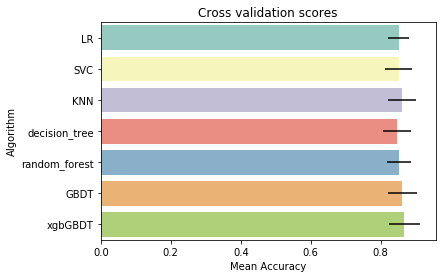

In [147]:
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,
                       "Algorithm":["LR","SVC",'KNN','decision_tree',"random_forest","GBDT","xgbGBDT"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [148]:
cv_res

,Algorithm,CrossValMeans,CrossValerrors
0,LR,0.851794,0.029848
1,SVC,0.851744,0.038834
2,KNN,0.860821,0.038659
3,decision_tree,0.847326,0.040037
4,random_forest,0.851933,0.034788
5,GBDT,0.861907,0.040951
6,xgbGBDT,0.867513,0.043835


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score

In [84]:
class Ensemble(object):
    
    def __init__(self,estimators):
        self.estimator_names = []
        self.estimators = []
        for i in estimators:
            self.estimator_names.append(i[0])
            self.estimators.append(i[1])
        self.clf = LogisticRegression()
    
    def fit(self, train_x, train_y):
        for i in self.estimators:
            i.fit(train_x,train_y)
        x = np.array([i.predict(train_x) for i in self.estimators]).T
        y = train_y
        self.clf.fit(x, y)
    
    def predict(self,x):
        x = np.array([i.predict(x) for i in self.estimators]).T
        #print(x)
        return self.clf.predict(x)
        
    
    def score(self,x,y):
        s = precision_score(y,self.predict(x))
        return s

In [155]:
bag = Ensemble([('knn',knn),('lr',lr),('svc',svc),('gbdt',gbdt),('rf',rf)])
score = 0
for i in range(0,10):
    num_test = 0.20
    X_train, X_cv, Y_train, Y_cv = train_test_split(train_x, train_y, test_size=num_test)
    bag.fit(X_train, Y_train)
    #Y_test = bag.predict(X_test)
    acc_xgb = round(bag.score(X_cv, Y_cv) * 100, 2)
    score+=acc_xgb
print(score/10)  #0.8786

87.642


In [88]:
clf = RandomForestClassifier()
clf.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [514]:
features = pd.DataFrame()
features['feature'] = train_x.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

In [ ]:
features.plot(kind='barh', figsize=(25, 25))

In [90]:
from sklearn.feature_selection import SelectFromModel

In [110]:
simplified_model = SelectFromModel(clf, prefit=True)
re_test = simplified_model.transform(test_x)
# X_test1 = simplified_model.transform(X_test)

In [92]:
re_train.shape

(891, 25)

In [565]:
# forest_clf = RandomForestClassifier(max_depth=4, n_estimators=33)
gboost.fit(train_reduced2, y_train)
scores = cross_val_score(gboost, train_reduced2, y_train, cv=10)
scores.mean()

0.84396578140960155

In [153]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('knn',knn),('lr',lr),('svc',svc),('gbdt',gbdt),('rf',rf)],
    voting='soft')
voting_clf.fit(train_x, train_y)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')), ('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1,...mators=300, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [154]:
scores = cross_val_score(voting_clf, train_x, train_y, cv=10)
scores.mean()

0.8674997162637611

In [355]:
gboost = GradientBoostingClassifier(n_estimators=33)
scores = cross_val_score(gboost, train_reduced, y_train, cv=10)
print(scores.mean())

0.823815968676


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

In [347]:
y_train.shape

(668,)

In [141]:
from sklearn.model_selection import train_test_split

for per in range(2,5):   
    X_train, X_val, Y_train, Y_val = train_test_split(train_x, train_y)

    gbrt = RandomForestClassifier(max_depth=per, n_estimators=350)
    gbrt.fit(X_train, Y_train)
    
    scores = []
    for y_pred in gbrt.staged_predict(X_val):
        scores += [sum(y_pred == Y_val)/len(y_pred)]

    print(per, np.argmax(scores),max(scores), len(scores), scores[-1])

# bst_n_estimators = np.argmax(scores)
# bst_n_estimators
# gbrt_best = GradientBoostingClassifier(n_estimators=bst_n_estimators, random_state=42)
# gbrt_best.fit(X_train, Y_train)

AttributeError: 'RandomForestClassifier' object has no attribute 'staged_predict'

In [125]:
len(scores)

500

In [358]:
max_score = np.max(scores)

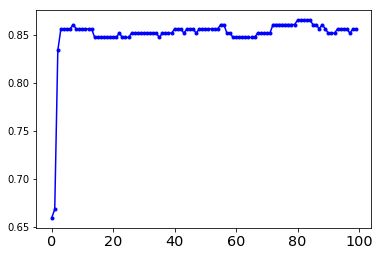

In [370]:
plt.plot(scores, "b.-")
# plt.plot([bst_n_estimators, bst_n_estimators], [0, max_score], "k--")
# plt.plot([0, 100], [max_score, max_score], "k--")
# plt.plot(bst_n_estimators, max_score, "ko")
# plt.text(bst_n_estimators, max_score*1.2, "Minimum", ha="center", fontsize=14)
# plt.axis([0, 100, 0, 0.01])
# plt.xlabel("Number of trees")
# plt.title("Validation error", fontsize=14)

To improve this result further, you could:
* Compare many more models and tune hyperparameters using cross validation and grid search,
* Do more feature engineering, for example:
  * replace **SibSp** and **Parch** with their sum,
  * try to identify parts of names that correlate well with the **Survived** attribute (e.g. if the name contains "Countess", then survival seems more likely),
* try to convert numerical attributes to categorical attributes: for example, different age groups had very different survival rates (see below), so it may help to create an age bucket category and use it instead of the age. Similarly, it may be useful to have a special category for people traveling alone since only 30% of them survived (see below).

## Final

In [579]:
train_reduced2.shape

(891, 9)

In [ ]:
forest_clf.fit

In [585]:
len(X_test[34])

9

In [156]:
output = voting_clf.predict(test_x)
tt=pd.DataFrame({'Survived':output})  
tt.to_csv('.../test.csv',index=False)  

In [36]:
train_data["RelativesOnboard"] = train_data["SibSp"] + train_data["Parch"]
train_data[["RelativesOnboard", "Survived"]].groupby(['RelativesOnboard']).mean()

,Survived
RelativesOnboard,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [ ]:
#根据某些特征相同的人群的平均值/中位数来填充对应人群中的缺失值
#下面按相同Sex（2）和Pclass（3）的age中位数来填充在该条件下，缺失age的人的信息
median_ages=np.zeros((2,3))
median_ages_test=np.zeros((2,3))
for i in range(0,2):
    for j in range(0,3):
        median_ages[i,j]=data[(data['Gender']==i)&(data['Pclass']==j+1)]['Age'].dropna().median()
for i in range(0,2):
    for j in range(0,3):    
        data.loc[(data.Age.isnull())&(data.Gender==i)&(data.Pclass==j+1),'AgeFill']=median_ages[i,j]